Tarea 2
Ricardo Zamora Mennigke
Visualizacion

1. [50 puntos] Utilizando los datos del archivo 02 17 21 EXCEL SERIES.xlsx realice lo siguiente:

a) Utilizando la funci´on read excel de la bibliotega pandas lea los datos.
b) Seleccione una provincia de su preferencia y filtre la tabla para que s´olo contenga los casos
activos de esa provincia.
c) Utilizando la funci´on plot del objeto geopandas y la biblioteca matplotlib represente
en un mapa la cantidad de casos activos por distrito para la provincia seleccionada.
d) Cree 4 grupos utilizando cuantiles.
e) Agregue al gr´afico un t´ıtulo, subtitulo y fuente, as´ı como las anotaciones que considere
necesarias

In [40]:
import geopandas as gp
import os
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
%matplotlib inline
plt.ioff()
import numpy as np
import pandas as pd
import re

pasada = os.getcwd()
os.chdir("C:/Users/rzamoram/OneDrive - Intel Corporation/Documents/Machine Learning/Visualizacion de Datos en Python/Semana 2")
print(os.getcwd())


def eliminar_tildes(texto):
    texto = re.sub("á",'a', texto)
    texto = re.sub('é','e', texto)
    texto = re.sub('í','i', texto)
    texto = re.sub('ó','o', texto)
    texto = re.sub('ú','u', texto)
    texto = re.sub('ñ','n', texto)
    return texto.upper()

def arreglar_nombres(texto):
    texto = eliminar_tildes(texto)
    texto = re.sub('LEON CORTES CASTRO','LEON CORTES', texto)
    texto = re.sub('VAZQUEZ DE CORONADO','VASQUEZ DE CORONADO', texto)
    texto = re.sub('VALVERDE VEGA','SARCHI', texto)
    texto = re.sub('CARMEN', 'CARMEN', texto)
    return texto

datos_covid = pd.read_excel(io = "02_17_21_EXCEL_SERIES.xlsx", sheet_name= "3_4 DIST_ACTIV")
datos_covid = pd.melt(datos_covid,
id_vars = ['cod_provin',"provincia",'cod_canton',"canton", "codigo_dta", "distrito"],
var_name = 'fecha',
value_name = 'activos')
datos_covid = datos_covid[datos_covid["fecha"] == "2021-02-17"]
datos_covid = datos_covid[datos_covid["provincia"] == "Cartago"]
datos_covid.head(20)

datos_covid.canton = [arreglar_nombres(x) for x in datos_covid.canton]
datos_covid.distrito = [eliminar_tildes(x) for x in datos_covid.distrito]
datos_covid.head(20)

datos_covid = datos_covid.set_index(['canton','distrito'])
datos_covid
distritos = gp.read_file("geo_data/distritos/distritos.shp")
distritos.canton = [arreglar_nombres(x) for x in distritos.canton]
distritos.distrito = [eliminar_tildes(x) for x in distritos.distrito]
distritos = distritos.set_index(['canton','distrito'])
distritos = distritos[distritos["provincia"] == "Cartago"]
distritos

C:\Users\rzamoram\OneDrive - Intel Corporation\Documents\Machine Learning\Visualizacion de Datos en Python\Semana 2


provincia  poblacion     area_k2  \
canton    distrito                                                 
EL GUARCO PATIO DE AGUA           Cartago      442.0   10.923561   
CARTAGO   CORRALILLO              Cartago    11749.0   32.734023   
PARAISO   OROSI                   Cartago     9925.0  376.606151   
EL GUARCO TOBOSI                  Cartago     7444.0   20.047187   
          EL TEJAR                Cartago    26465.0    6.138681   
CARTAGO   AGUACALIENTE            Cartago    35167.0   99.698284   
JIMENEZ   PEJIBAYE                Cartago     3643.0  172.994137   
CARTAGO   DULCE NOMBRE            Cartago    11688.0   33.588912   
PARAISO   LLANOS DE SANTA LUCIA   Cartago    18723.0    6.531843   
CARTAGO   ORIENTAL                Cartago    12420.0    2.106482   
          OCCIDENTAL              Cartago    10358.0    1.971203   
JIMENEZ   TUCURRIQUE              Cartago     5513.0   33.464625   
PARAISO   CACHI                   Cartago     5793.0   41.100532   
TURRIALBA TAYUTIC                 Cartago     2550.0   74.671860   
PARAISO   PARAISO                 Cartago    21294.0   27.275475   
CARTAGO   GUADALUPE               Cartago    16072.0   13.169466   
          QUEBRADILLA             Cartago     5897.0   19.130910   
OREAMUNO  SAN RAFAEL              Cartago    28799.0   10.290509   
CARTAGO   CARMEN                  Cartago    18935.0    4.335242   
TURRIALBA TUIS                    Cartago     2989.0   39.287710   
LA UNION  RIO AZUL                Cartago    14075.0    4.890741   
PARAISO   SANTIAGO                Cartago     6272.0   25.617615   
LA UNION  SAN DIEGO               Cartago    24297.0    8.077995   
OREAMUNO  CIPRESES                Cartago     4083.0    9.380293   
LA UNION  TRES RIOS               Cartago     9324.0    2.288702   
OREAMUNO  COT                     Cartago    10843.0   14.840463   
ALVARADO  CERVANTES               Cartago     6704.0   15.164301   
LA UNION  SAN RAFAEL              Cartago    15613.0    9.504660   
          SAN JUAN                Cartago    15225.0    3.967883   
CARTAGO   SAN NICOLAS             Cartago    28846.0   29.244552   
TURRIALBA LA SUIZA                Cartago     7988.0  161.125750   
          TURRIALBA               Cartago    27239.0   56.611715   
LA UNION  CONCEPCION              Cartago    18452.0    3.744149   
          SAN RAMON               Cartago     4382.0    3.517299   
JIMENEZ   JUAN VINAS              Cartago     7099.0   43.368262   
LA UNION  DULCE NOMBRE            Cartago     8826.0    8.292449   
TURRIALBA LA ISABEL               Cartago     6346.0   19.763895   
          PAVONES                 Cartago     4627.0   42.021044   
          SANTA ROSA              Cartago     5689.0   18.610195   
CARTAGO   LLANO GRANDE            Cartago     4900.0   30.332461   
          TIERRA BLANCA           Cartago     5695.0   12.807188   
OREAMUNO  POTRERO CERRADO         Cartago     2592.0   18.116247   
TURRIALBA TRES EQUIS              Cartago     1954.0   36.913490   
ALVARADO  PACAYAS                 Cartago     5880.0   29.598196   
TURRIALBA PERALTA                 Cartago      615.0    9.647094   
ALVARADO  CAPELLADES              Cartago     2635.0   34.369824   
TURRIALBA SANTA TERESITA          Cartago     5339.0   60.226555   
          SANTA CRUZ              Cartago     3737.0  129.566528   
OREAMUNO  SANTA ROSA              Cartago     2912.0  150.335295   
TURRIALBA CHIRRIPO                Cartago     4543.0  941.109777   
EL GUARCO SAN ISIDRO              Cartago    11197.0  134.470506   

                                                                          geometry  
canton    distrito                                                                  
EL GUARCO PATIO DE AGUA          POLYGON ((-84.00351 9.80911, -84.00210 9.80815...  
CARTAGO   CORRALILLO             POLYGON ((-84.01908 9.81574, -84.01856 9.81427...  
PARAISO   OROSI                  POLYGON ((-83.84281 9.82141, -83.84155 9.82054...  
EL

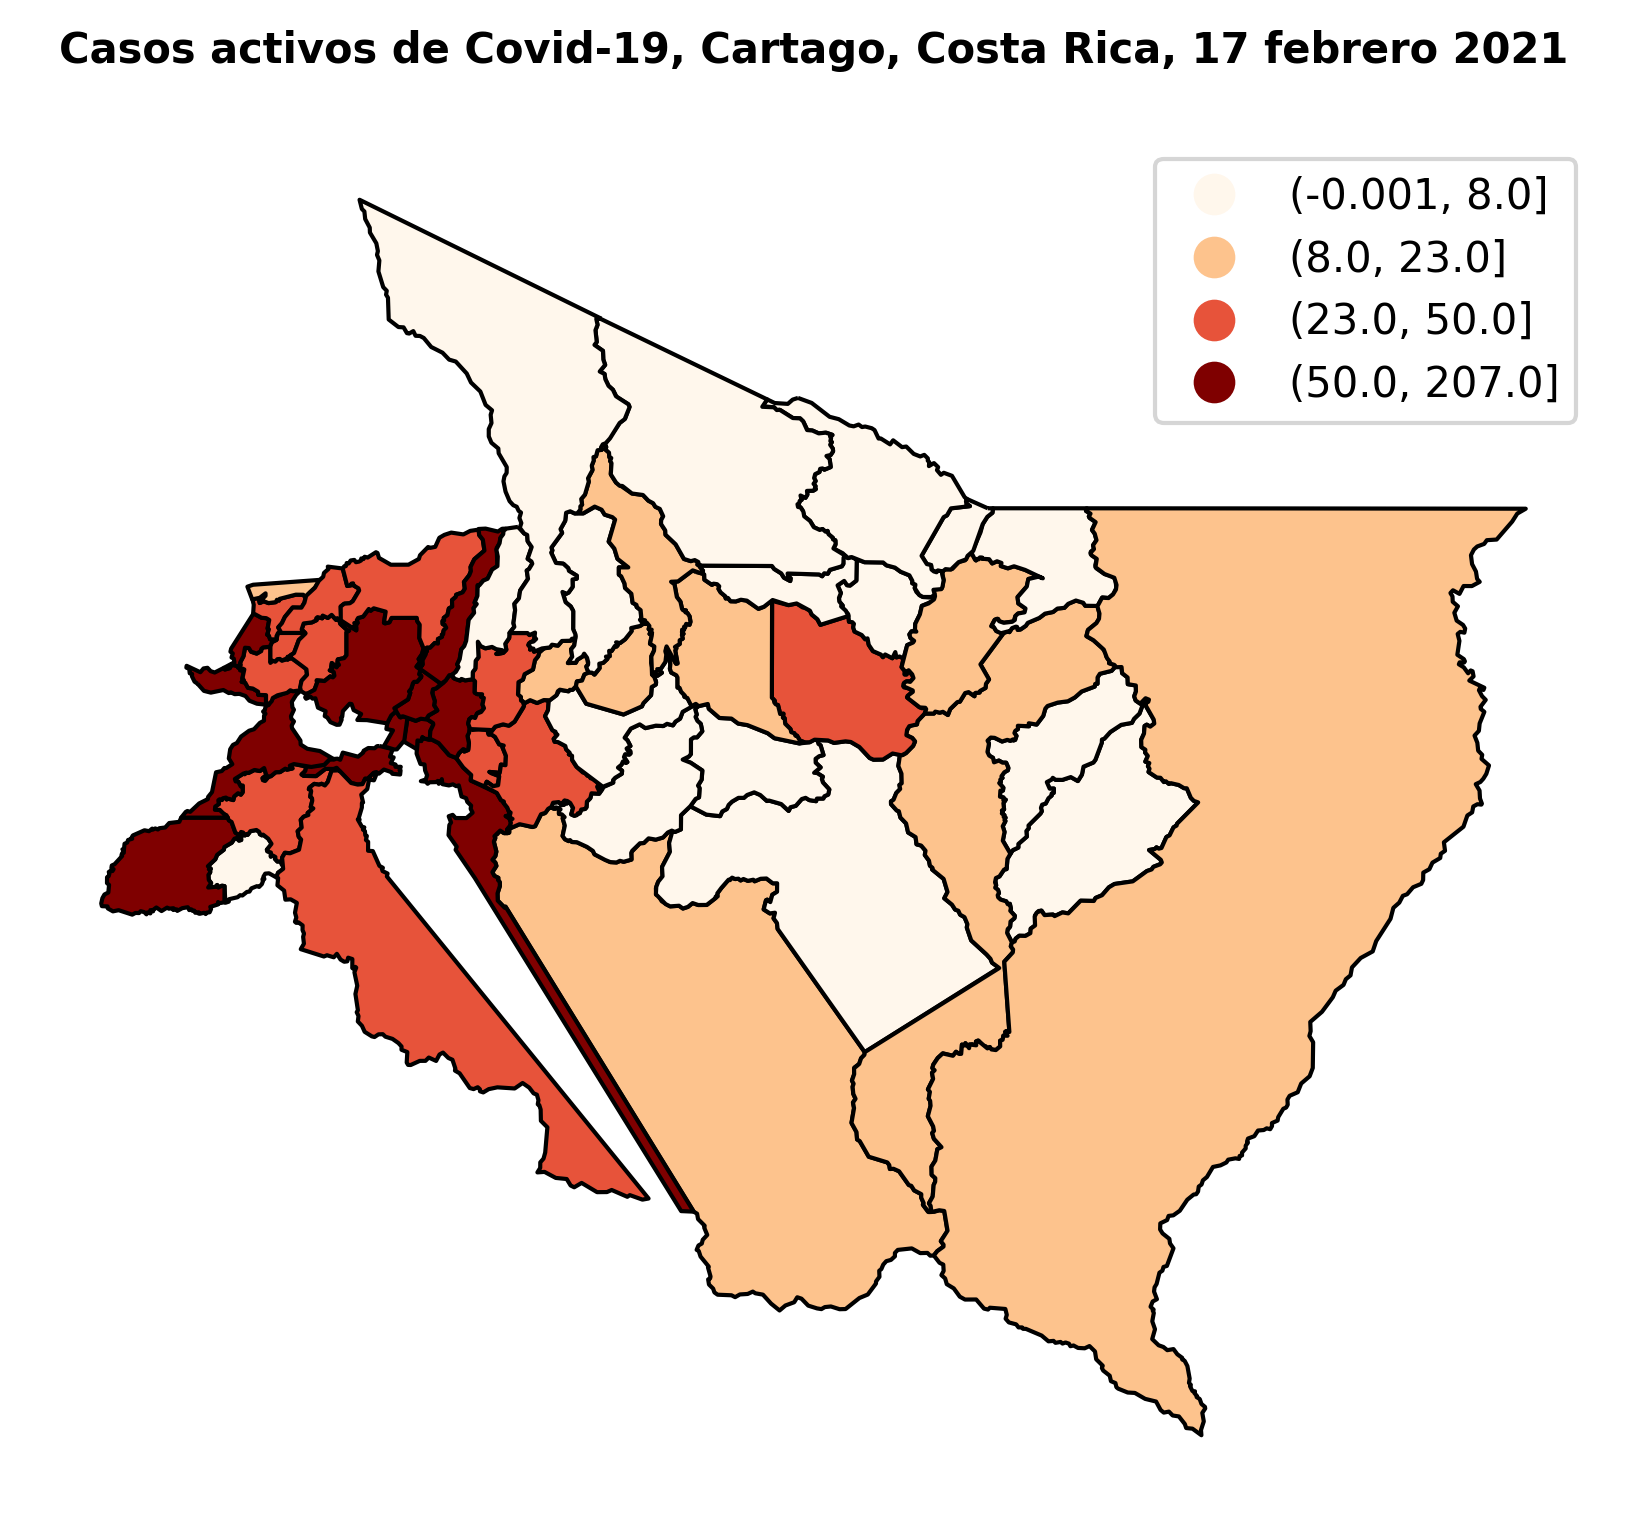

In [44]:
set(distritos.index) - set(datos_covid.index)

df = distritos.merge(datos_covid, how = "left", left_index = True, right_index = True)
df.head()

df["grupos"] = pd.qcut(x = df.activos, q = 4)
df.grupos.head()

fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi = 300)

ax.set_title("Casos activos de Covid-19, Cartago, Costa Rica, 17 febrero 2021",
fontdict = {"fontsize":10},
pad = 18,
weight = "bold")
ax.set_axis_off() 

df.plot(ax = ax,
column = 'grupos', 
legend = True, 
edgecolor = 'black',
cmap = 'OrRd')
plt.show()

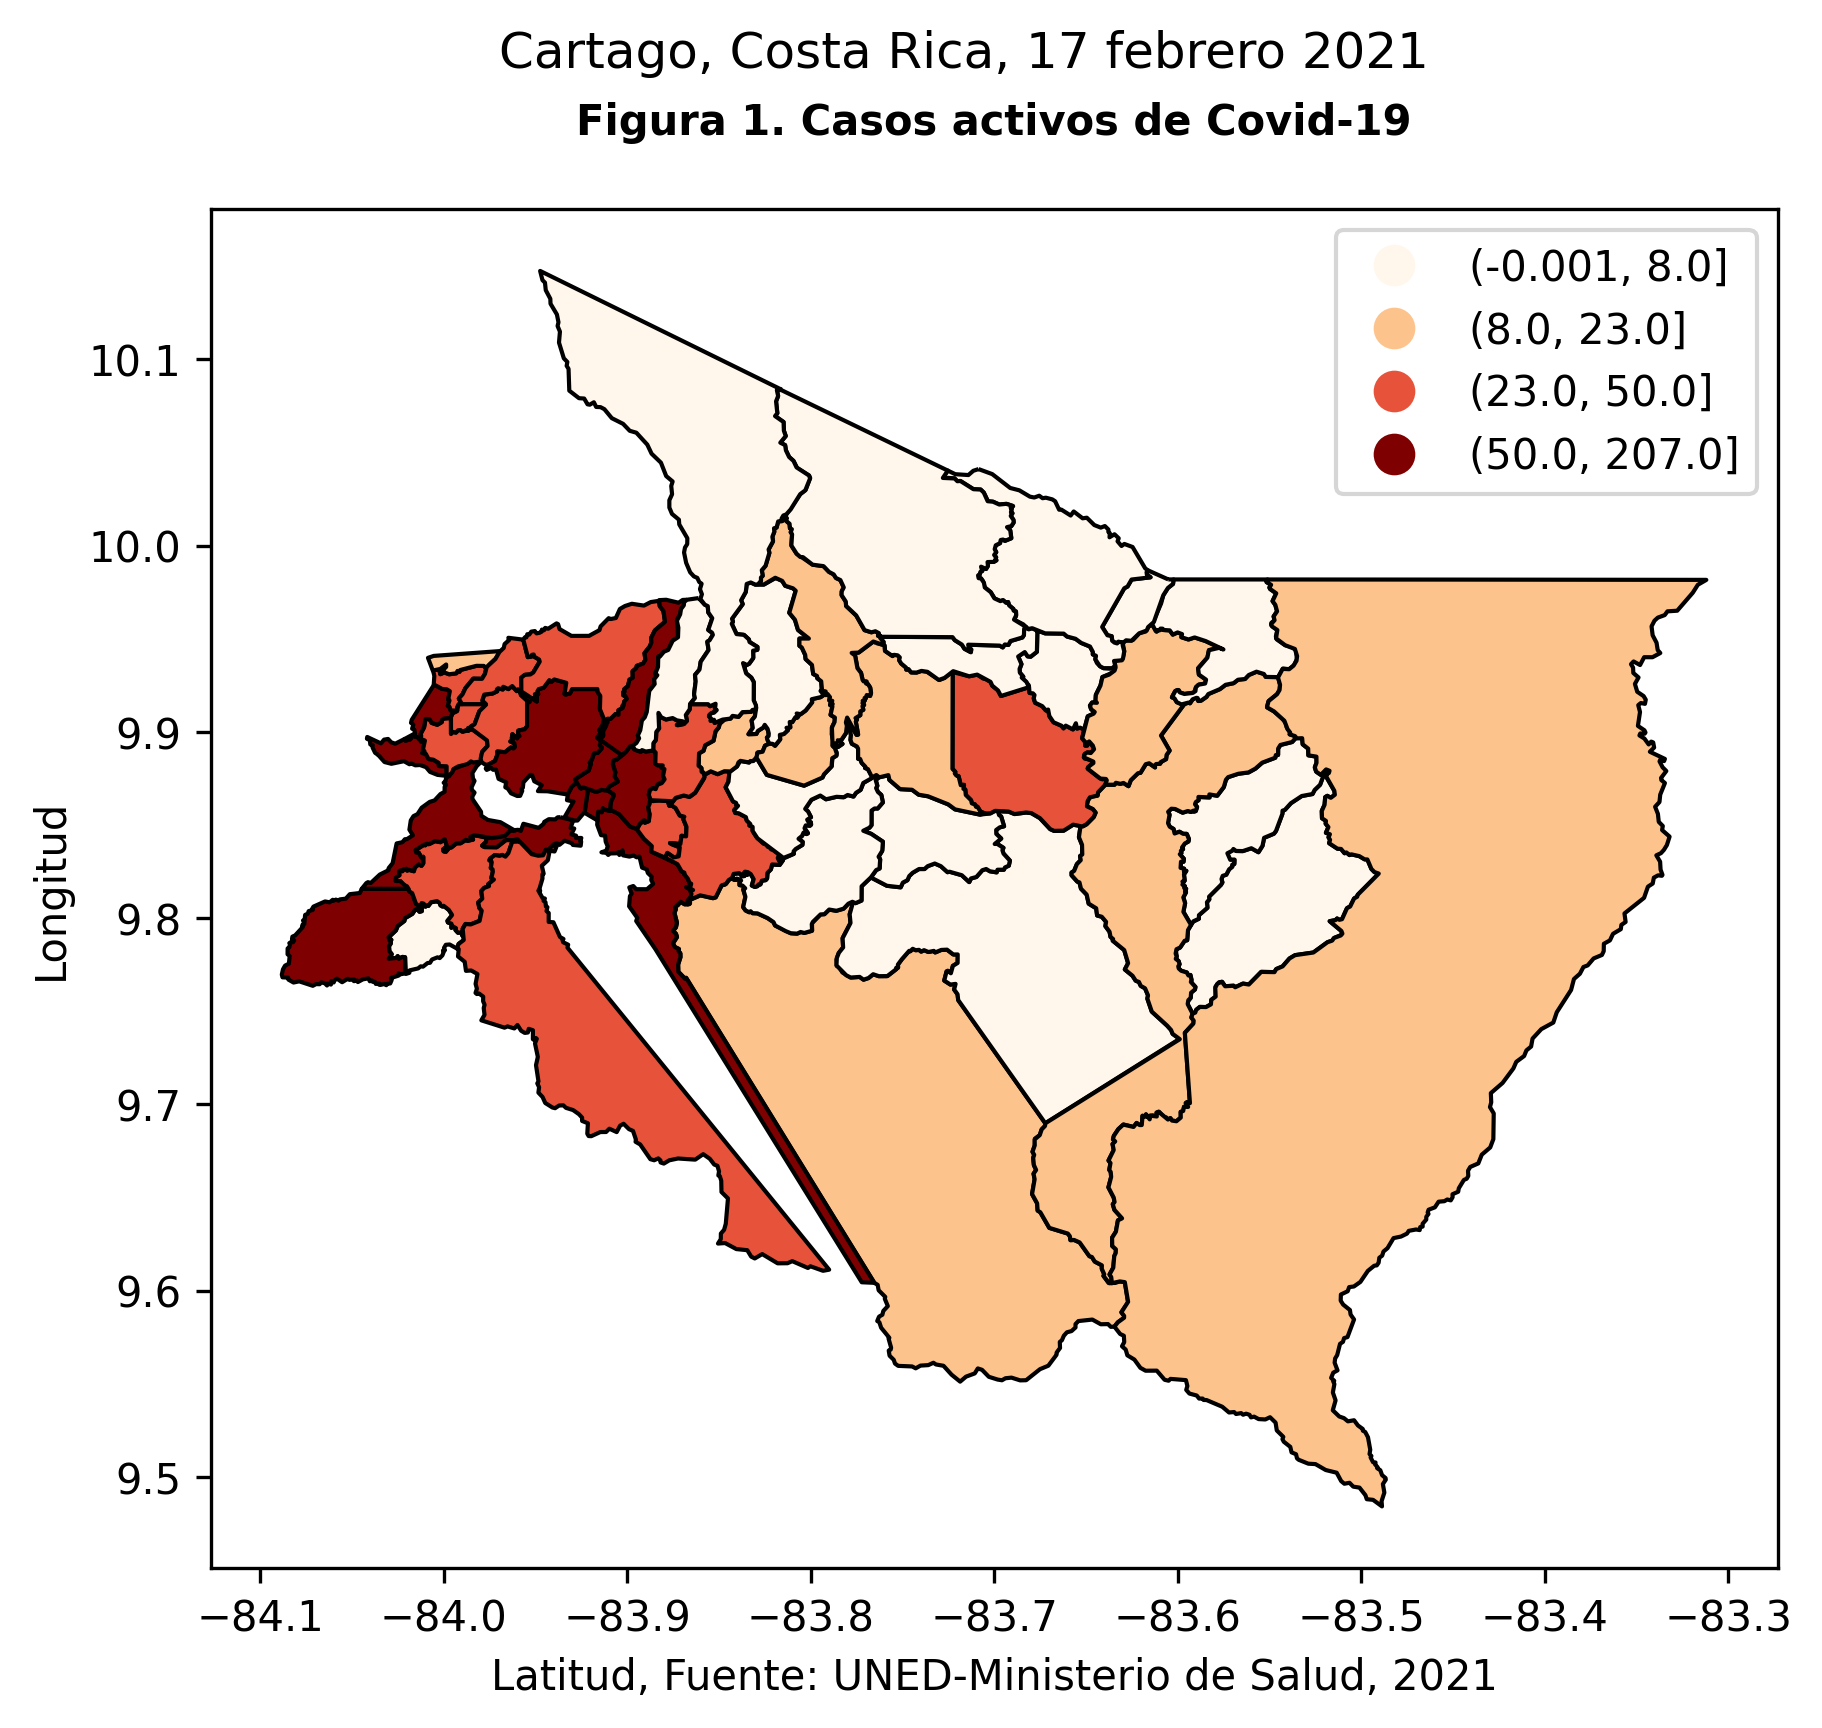

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi = 300)

ax.set_title("Figura 1. Casos activos de Covid-19",
fontdict = {"fontsize":10},
pad = 18,
weight = "bold")

ax.set_ylabel("Longitud")
ax.set_xlabel("Latitud, Fuente: UNED-Ministerio de Salud, 2021")

#ax.set_axis_off() 

plt.suptitle('Cartago, Costa Rica, 17 febrero 2021')

df.plot(ax = ax,
column = 'grupos', 
legend = True, 
edgecolor = 'black',
cmap = 'OrRd')
plt.show()

2. [50 puntos] Utilizando los datos de la tabla delitoscr.csv realice lo siguiente:

a) Utilizando la funci´on read csv de la biblioteca pandas lea los datos.
b) Seleccione una provincia de su preferencia y realice el conteo de los delitos reportados
agrupando los datos por cant´on, para esto puede utilizar la funci´on groupby del objeto
pandas
c) Utilizando a libreria folium cree un mapa interactivo que permita saber el nombre del
cant´on y cantidad de asaltos reportados.

In [124]:
import folium

In [143]:
import datetime as dt
delitos = pd.read_csv("delitoscr.csv", index_col=0)
delitos.Fecha = pd.to_datetime(delitos.Fecha)

In [150]:
delitos_mes_canton = delitos[delitos.Provincia == "Puntarenas"]
delitos_mes_provincia = delitos_mes_canton.set_index('Fecha')

delitos_mes_canton = delitos_mes_provincia.groupby(["Canton"]).count()["Delito"]
delitos_mes_canton.head(20)


Canton
Buenos Aires      160
Corredores        340
Coto Brus          59
Esparza           177
Garabito          406
Golfito           227
Montes De Oro      21
Osa               124
Parrita           203
Puntarenas       1838
Quepos            432
Name: Delito, dtype: int64

In [151]:
cantones = gp.read_file("geo_data/cantones/cantones.shp")
cantones["canton2"] = cantones.canton
cantones.head(10)

,provincia,canton,poblacion,area_k2,geometry,canton2
0,Puntarenas,Corredores,51291.0,623.723527,"POLYGON ((-82.90137 8.72708, -82.90033 8.72265...",Corredores
1,Puntarenas,Golfito,44572.0,1750.056183,"MULTIPOLYGON (((-83.46660 8.68827, -83.46669 8...",Golfito
2,Puntarenas,Coto Brus,44176.0,944.175405,"POLYGON ((-82.96647 9.09421, -82.96337 9.09420...",Coto Brus
3,Puntarenas,Osa,30818.0,1922.774483,"POLYGON ((-83.83946 9.25534, -83.83642 9.25533...",Osa
4,Puntarenas,Buenos Aires,52126.0,2382.972927,"POLYGON ((-83.32101 9.38409, -83.31462 9.38327...",Buenos Aires
5,San José,Pérez Zeledón,142789.0,1901.393446,"POLYGON ((-83.77329 9.59825, -83.77217 9.59826...",Pérez Zeledón
6,Puntarenas,Quepos,32121.0,559.010331,"POLYGON ((-84.13572 9.57168, -84.13337 9.57091...",Quepos
7,Limón,Talamanca,41518.0,2814.658267,"POLYGON ((-82.89452 9.76752, -82.89216 9.76713...",Talamanca
8,Puntarenas,Parrita,19457.0,479.629981,"POLYGON ((-84.30298 9.64969, -84.30067 9.64754...",Parrita
9,San José,Tarrazú,18264.0,290.111618,"POLYGON ((-83.98178 9.71802, -83.97882 9.71819...",Tarrazú


In [152]:
df = cantones.merge(delitos_mes_canton, left_on = "canton", right_index=True)
df.head(10)

,provincia,canton,poblacion,area_k2,geometry,canton2,Delito
0,Puntarenas,Corredores,51291.0,623.723527,"POLYGON ((-82.90137 8.72708, -82.90033 8.72265...",Corredores,340
1,Puntarenas,Golfito,44572.0,1750.056183,"MULTIPOLYGON (((-83.46660 8.68827, -83.46669 8...",Golfito,227
2,Puntarenas,Coto Brus,44176.0,944.175405,"POLYGON ((-82.96647 9.09421, -82.96337 9.09420...",Coto Brus,59
3,Puntarenas,Osa,30818.0,1922.774483,"POLYGON ((-83.83946 9.25534, -83.83642 9.25533...",Osa,124
4,Puntarenas,Buenos Aires,52126.0,2382.972927,"POLYGON ((-83.32101 9.38409, -83.31462 9.38327...",Buenos Aires,160
6,Puntarenas,Quepos,32121.0,559.010331,"POLYGON ((-84.13572 9.57168, -84.13337 9.57091...",Quepos,432
8,Puntarenas,Parrita,19457.0,479.629981,"POLYGON ((-84.30298 9.64969, -84.30067 9.64754...",Parrita,203
11,Puntarenas,Garabito,24737.0,315.381452,"POLYGON ((-84.67583 9.87729, -84.67448 9.87743...",Garabito,406
20,Puntarenas,Puntarenas,136328.0,1814.377239,"MULTIPOLYGON (((-84.89357 9.77338, -84.89311 9...",Puntarenas,1838
44,Puntarenas,Esparza,74218.0,217.465806,"POLYGON ((-84.68285 10.12780, -84.67728 10.124...",Esparza,177


In [153]:
x = df.centroid.x.mean()
print(x)
y = df.centroid.y.mean()
print(y)

import folium

x = df.centroid.x.mean()
y = df.centroid.y.mean()

m = folium.Map(location=[y, x], zoom_start = 9, tiles = None)
folium.TileLayer('CartoDB positron',control=False).add_to(m)

-83.84839657649816
9.260641755109026


C:\Users\rzamoram\AppData\Local\Continuum\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.
C:\Users\rzamoram\AppData\Local\Continuum\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\rzamoram\AppData\Local\Continuum\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

In [154]:
choropleth = folium.Choropleth(
 geo_data = df,
 data = df,
 columns = ["canton","Delito"],
 key_on = "feature.properties.canton",
 fill_color = 'OrRd',
 highlight = True).add_to(m)

In [155]:
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['canton','Delito'], labels=False)
).add_to(m)
display(m)